In [41]:
import numpy as np
import pandas as pd

import re
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/data/products_train.csv')

In [6]:
df.head()

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,NaN,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,NaN,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,NaN,Inhalt: 1 Stück


In [ ]:
df['locale'].unique()

array(['DE', 'JP', 'UK', 'ES', 'FR', 'IT'], dtype=object)

In [ ]:
df['locale'].value_counts()

locale
DE    518327
UK    500180
JP    395009
IT     50461
FR     44577
ES     42503
Name: count, dtype: int64

### Description

In [ ]:
for locale in df['locale'].unique():
    print(locale)
    print(df[df['locale'] == locale]['desc'].describe())
    print('\n')

DE
count                                                479601
unique                                               303769
top       FLEXIBEL & ELASTISCH: Die weiche Schutzhülle f...
freq                                                    310
Name: desc, dtype: object


JP
count     352846
unique    192734
top       原産国:日本
freq        2039
Name: desc, dtype: object


UK
count                                                460922
unique                                               297178
top       International products have separate terms, ar...
freq                                                    309
Name: desc, dtype: object


ES
count                                                 40796
unique                                                28644
top       Biseles elevados para proteger la pantalla y l...
freq                                                     77
Name: desc, dtype: object


FR
count                                                 42141
unique                   

In [ ]:
# calculate the average word count of each description
df['desc'] = df['desc'].fillna('')
df['word_count'] = df['desc'].str.split().apply(len)

In [ ]:
for locale in df['locale'].unique():
    print(locale)
    print(df[df['locale'] == locale]['word_count'].describe())
    print('\n')

DE
count    518327.000000
mean         23.721529
std          17.062670
min           0.000000
25%          10.000000
50%          22.000000
75%          34.000000
max         172.000000
Name: word_count, dtype: float64


JP
count    395009.000000
mean          2.086413
std           3.497574
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         223.000000
Name: word_count, dtype: float64


UK
count    500180.000000
mean         26.218967
std          19.731361
min           0.000000
25%           9.000000
50%          24.000000
75%          39.000000
max         195.000000
Name: word_count, dtype: float64


ES
count    42503.000000
mean        29.427429
std         21.098341
min          0.000000
25%         12.000000
50%         26.000000
75%         43.000000
max        152.000000
Name: word_count, dtype: float64


FR
count    44577.000000
mean        29.706104
std         21.506503
min          0.000000
25%         12.000000
50%    

**The average word count of descriptions in each language is as follows:**

DE
count    518327.000000
mean         23.721529
std          17.062670
min           0.000000
25%          10.000000
50%          22.000000
75%          34.000000
max         172.000000
Name: word_count, dtype: float64


JP
count    395009.000000
mean          2.086413
std           3.497574
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         223.000000
Name: word_count, dtype: float64


UK
count    500180.000000
mean         26.218967
std          19.731361
min           0.000000
25%           9.000000
50%          24.000000
75%          39.000000
max         195.000000
Name: word_count, dtype: float64


ES
count    42503.000000
mean        29.427429
std         21.098341
min          0.000000
25%         12.000000
50%         26.000000
75%         43.000000
max        152.000000
Name: word_count, dtype: float64


FR
count    44577.000000
mean        29.706104
std         21.506503
min          0.000000
25%         12.000000
50%         27.000000
75%         43.000000
max        201.000000
Name: word_count, dtype: float64


IT
count    50461.000000
mean        26.400943
std         20.090802
min          0.000000
25%         10.000000
50%         23.000000
75%         39.000000
max        153.000000
Name: word_count, dtype: float64

In [10]:
text = " ".join(description for description in df_UK_sample.desc)
text

'50mm focal length and maximum aperture of f/1.8 24x32 cm in size and can hold A4 documents 16 Hz-22 kHz frequency range Available on the website Adult Unisex Dog tags, Perfect for carnival, theme parties and Halloween'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


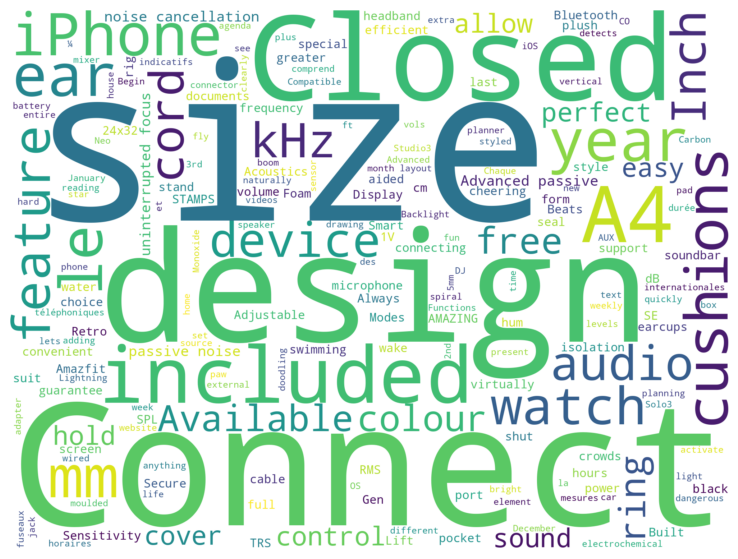

In [15]:
# plot the cloud of words


# Downloading the English stopwords from nltk
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

df_UK = df[df['locale'] == 'UK'].dropna()

text = " ".join(description for description in df_UK.desc)
# text = re.sub(r"[^a-zA-Z]", "", text)

# Creating the WordCloud object
wordcloud = WordCloud(stopwords=english_stopwords, background_color="white", width=2000, height=1500).generate(text)

# Displaying the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


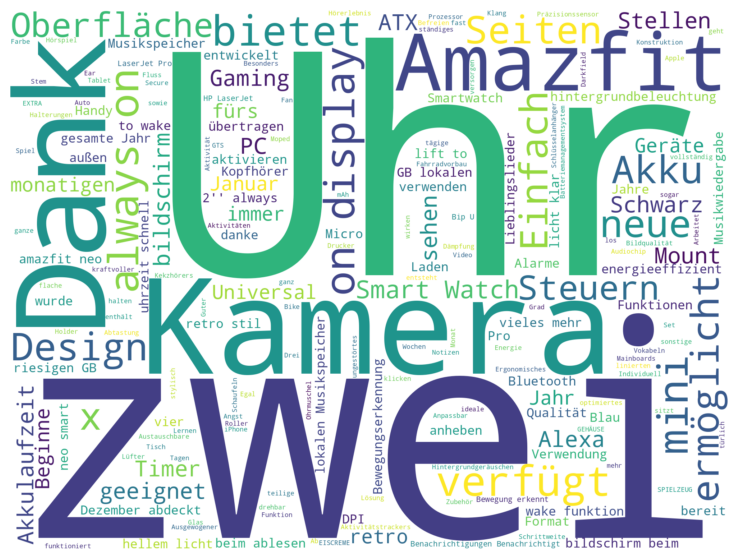

In [16]:
german_stopwords = set(stopwords.words('german'))


df_DE = df[df['locale'] == 'DE'].dropna()

# Preprocessing the text: keeping only characters that are common in German language, removing emojis and other symbols
text = " ".join(description for description in df_DE.desc)
# text = re.sub(r"[^a-zA-ZäöüÄÖÜß\s]", "", text)

# Creating the WordCloud object
wordcloud = WordCloud(stopwords=german_stopwords, background_color="white",width=2000, height=1500).generate(text)

# Displaying the WordCloud image:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# Install the janome library
!pip install janome wordcloud

# Import necessary libraries
from janome.tokenizer import Tokenizer

# Tokenize Japanese text
def tokenize(text):
    t = Tokenizer()
    tokens = t.tokenize(text, wakati=True)
    return " ".join(tokens)

df_JP = df[df['locale'] == 'JP'].dropna()


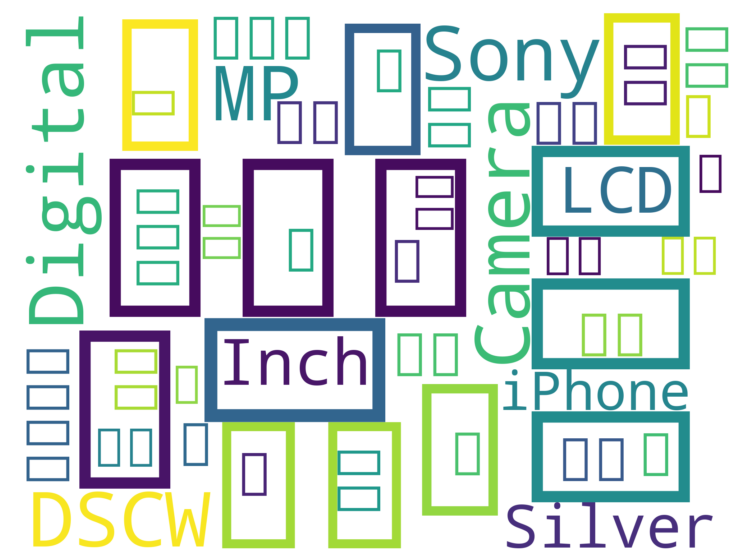

In [19]:

# Concatenate all descriptions into a single string, tokenizing each description
text = " ".join(tokenize(description) for description in df_JP.desc)

# Create a WordCloud object with Japanese stopwords (if you have a list of stopwords)
# For simplicity, this example doesn't use stopwords. You might want to add your own list.
wordcloud = WordCloud(background_color="white",width=2000, height=1500).generate(text)

# Display the generated WordCloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Price Distribution

In [29]:
for locale in df.locale.unique():
  df_locale = df[df['locale']==locale]
  top_5_prices = df_locale.sort_values(by='price', ascending=False).head(5)
  print(top_5_prices)
  print('\n\n\n\n')

                id locale                                              title  \
354232  B08Y5RZJHM     DE  Dehner Bio Kompostbeschleuniger, 5 kg, für ca....   
247970  B0B4MTX3HL     DE  Die Sims 4 Highschool-Jare (EP12)| Erweiterung...   
419499  B07FFVFFBZ     DE  Royal Leerdam Specials Whisky Aròme Tasting Gl...   
15999   B0B5M7269R     DE  Garmin Edge 530 + Quickfit Quarter Turn Bike M...   
247896  B0BD4V2646     DE  Magnet Wimpern 3D Magnetische Wimpern Natürlic...   

              price            brand    color                size  \
354232  40000000.07           Dehner    keine                 NaN   
247970  40000000.07  Electronic Arts      NaN                 NaN   
419499  40000000.07    Royal Leerdam      NaN  6 Stück (1er Pack)   
15999   40000000.07           GARMIN  Schwarz       Einheitsgröße   
247896  40000000.07          Chlffua  Schwarz                 NaN   

               model    material author  \
354232       6704647         NaN    NaN   
247970           N

In [30]:
df[df['price']==40000000.07].count()

id          69992
locale      69992
title       69992
price       69992
brand       65788
color       46347
size        37651
model       28437
material    35060
author       3004
desc        61055
dtype: int64

In [37]:
df_filtered = df[df['price']!=40000000.07]

In [39]:
df_filtered['price'].max()

3933800.0

In [40]:
df[df['price']==3933800].count()

id          1
locale      1
title       1
price       1
brand       1
color       1
size        0
model       0
material    1
author      0
desc        0
dtype: int64

In [44]:
df_filtered = df[df['price']<3933800]

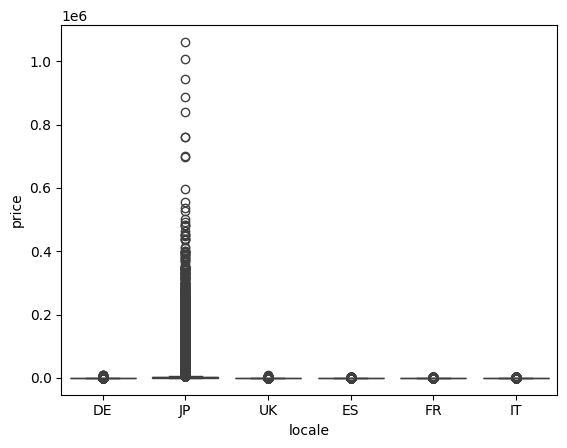

In [45]:
# Create a boxplot of the price column for each locale
sns.boxplot(x="locale", y="price", data=df_filtered)
plt.show()

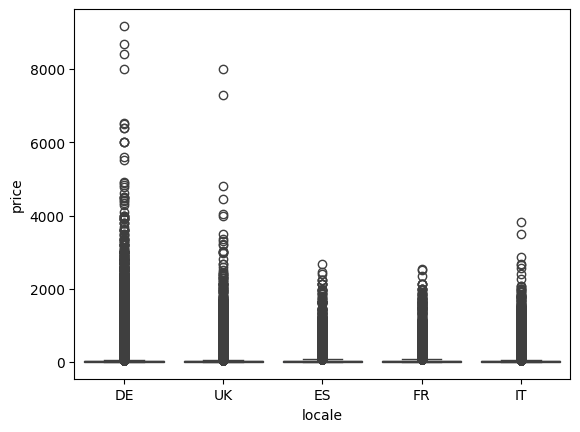

In [46]:
df_filtered_no_JP = df_filtered[df_filtered['locale']!='JP']
sns.boxplot(x="locale", y="price", data=df_filtered_no_JP)
plt.show()